In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
datadir = 'data/'

In [2]:
college_financials = pd.read_csv(datadir + 'college_financials.csv', header=0)
print('college_financials has {} records'.format(len(college_financials)))

college_financials has 87560 records


In [3]:
college_financials.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
academic_year,87560.0,2.005664e+03,3.875187e+00,2.000000e+03,2.002000e+03,2.006000e+03,2.009000e+03,2.012000e+03
sector,87560.0,5.217634e+00,6.372255e+00,0.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,9.900000e+01
cpi_index,87560.0,1.966365e+02,1.905173e+01,1.693000e+02,1.782000e+02,1.990000e+02,2.146580e+02,2.275650e+02
cpi_scalar_2012,87560.0,8.640892e-01,8.371996e-02,7.439633e-01,7.830730e-01,8.744754e-01,9.432821e-01,1.000000e+00
hepi_index,87560.0,2.465073e+02,3.267008e+01,1.969000e+02,2.127000e+02,2.531000e+02,2.793000e+02,2.932000e+02
hepi_scalar_2012,87560.0,8.407479e-01,1.114259e-01,6.715553e-01,7.254434e-01,8.632333e-01,9.525921e-01,1.000000e+00
heca_index,87560.0,8.592319e+01,9.505945e+00,7.152066e+01,7.663315e+01,8.733172e+01,9.472764e+01,1.000000e+02
heca_scalar_2012,87560.0,8.592319e-01,9.505945e-02,7.152066e-01,7.663315e-01,8.733172e-01,9.472764e-01,1.000000e+00
gross_tuition_fees_rev,74669.0,2.333891e+07,7.284207e+07,1.000000e+01,9.479340e+05,4.480596e+06,1.776200e+07,3.552224e+09
net_tuition_fees_rev,74772.0,1.886777e+07,6.015618e+07,-2.736279e+09,8.610788e+05,4.011468e+06,1.479336e+07,3.269544e+09


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


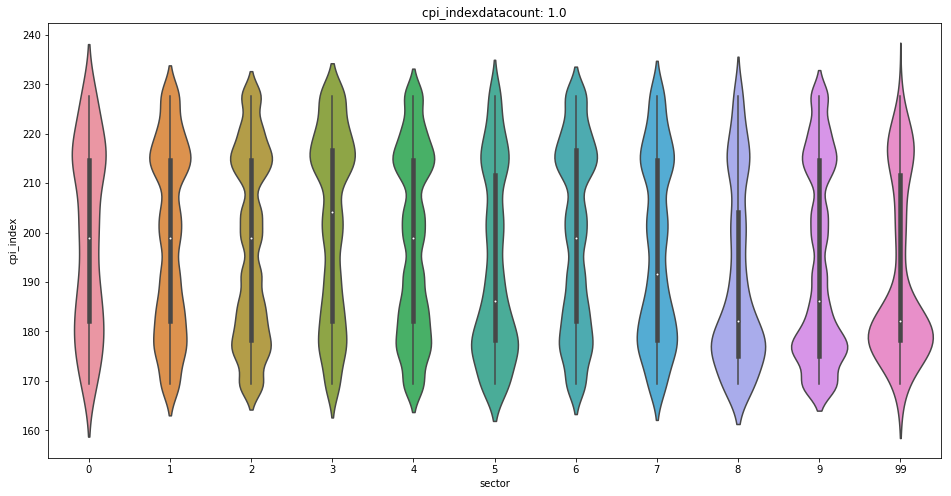

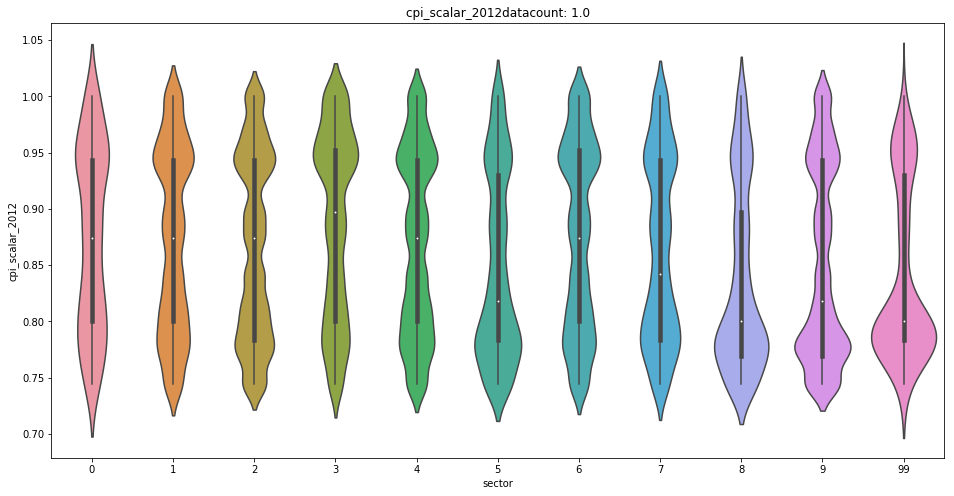

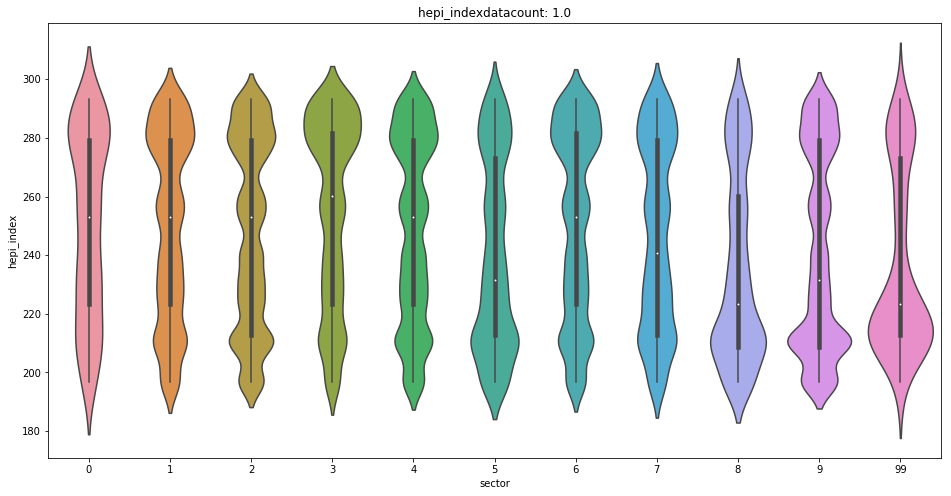

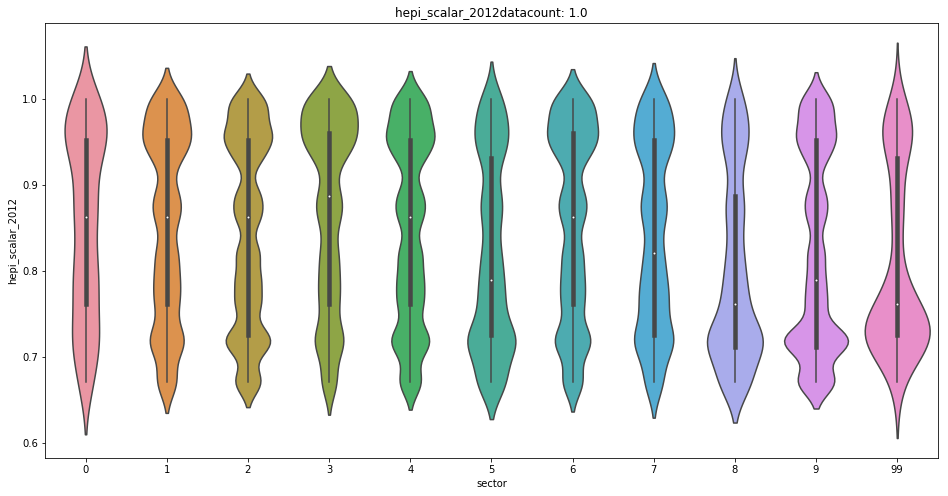

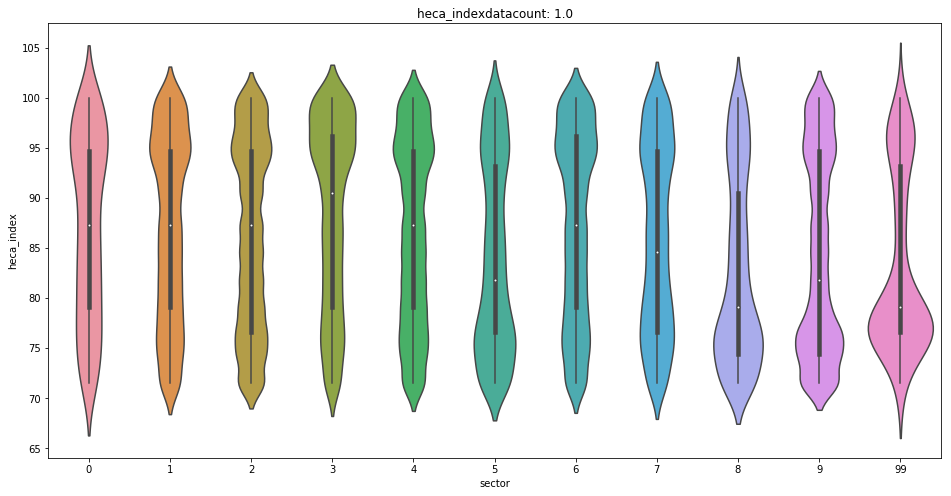

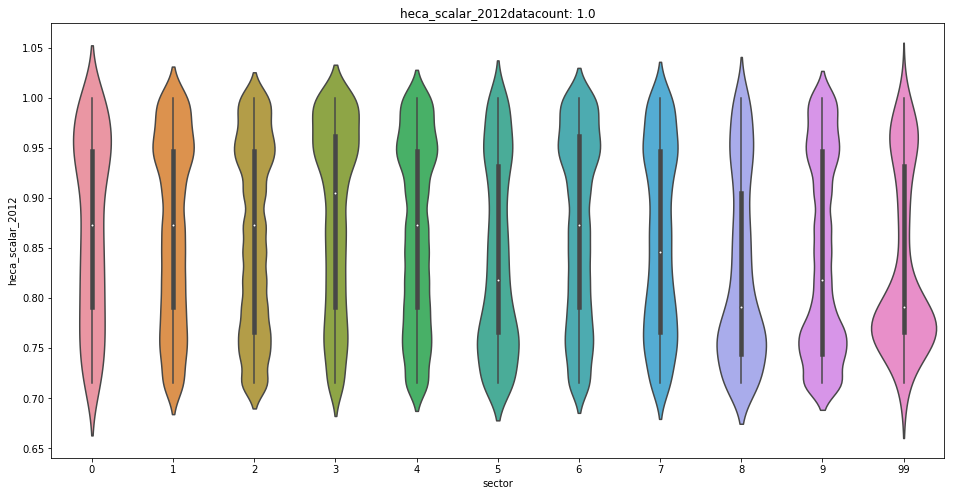

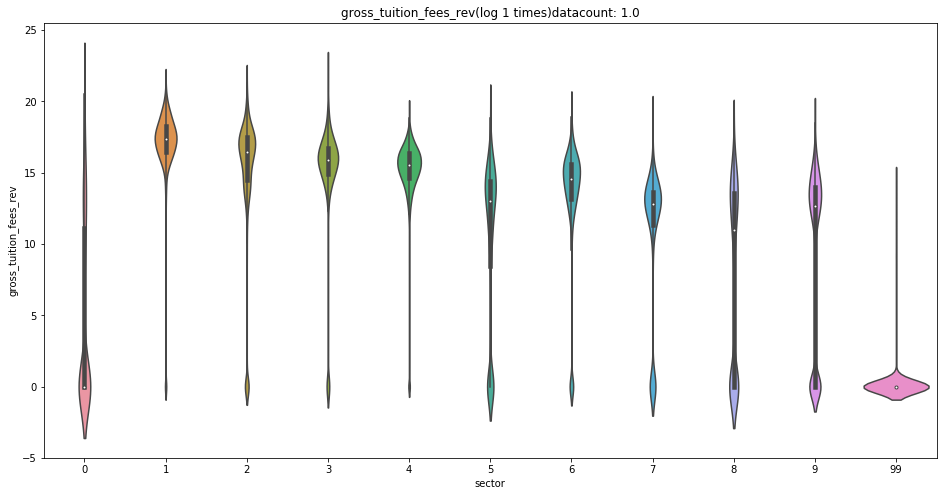

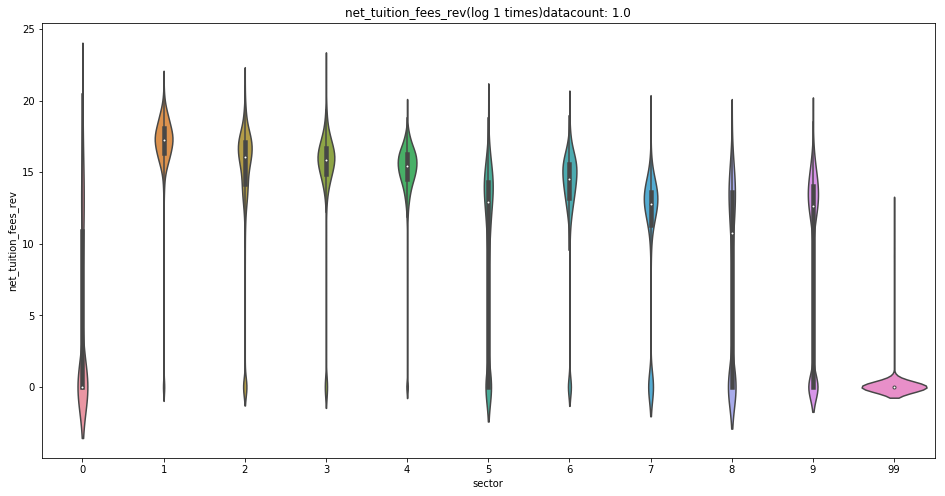

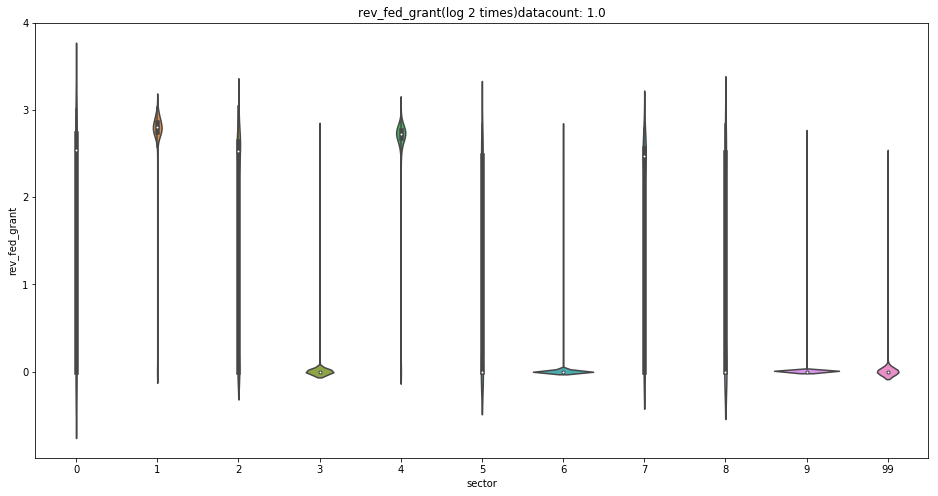

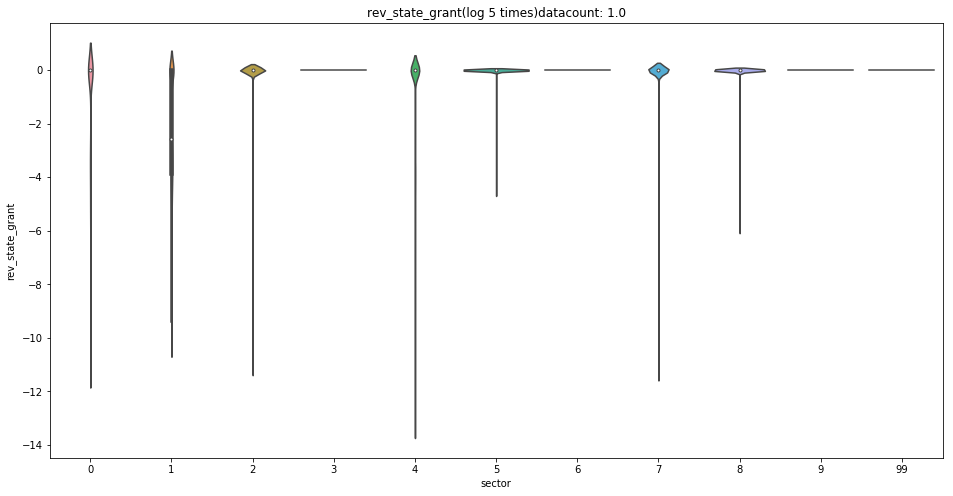

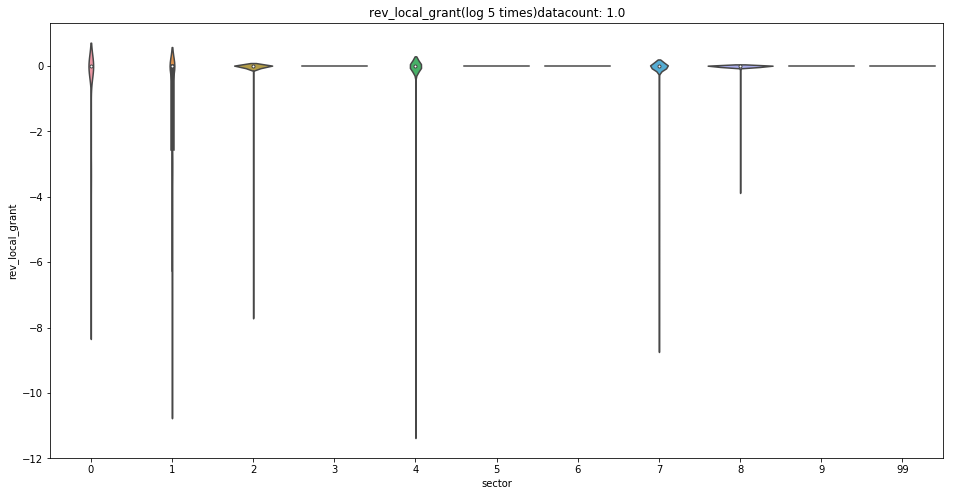

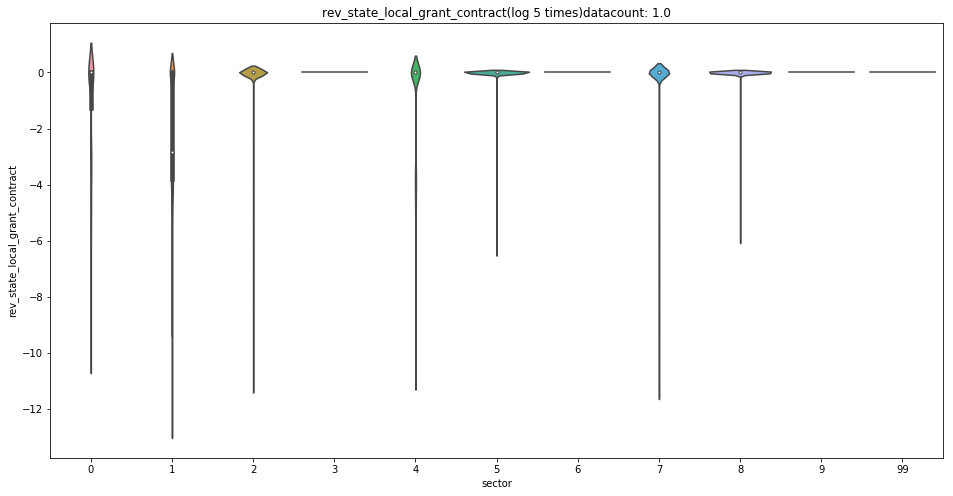

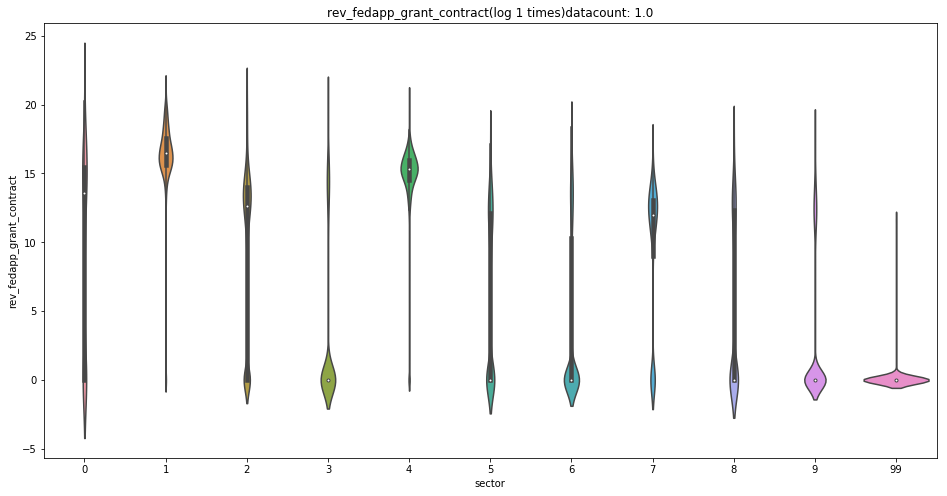

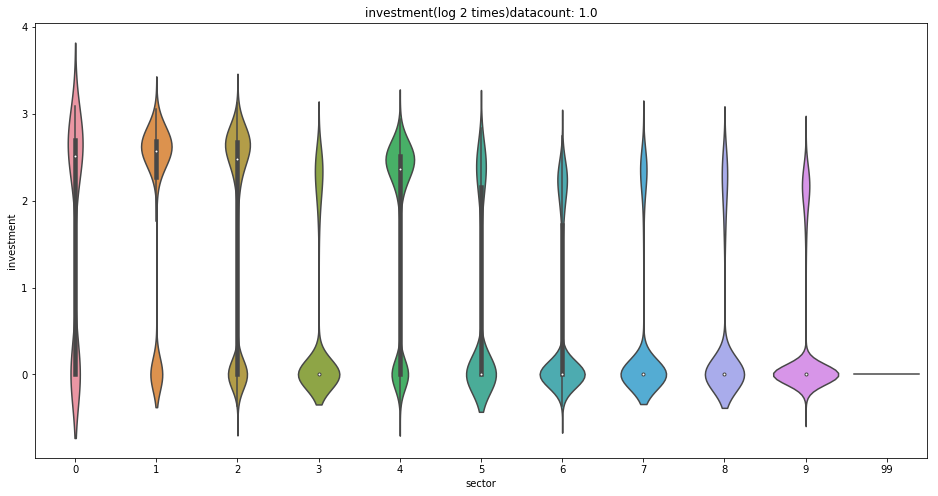

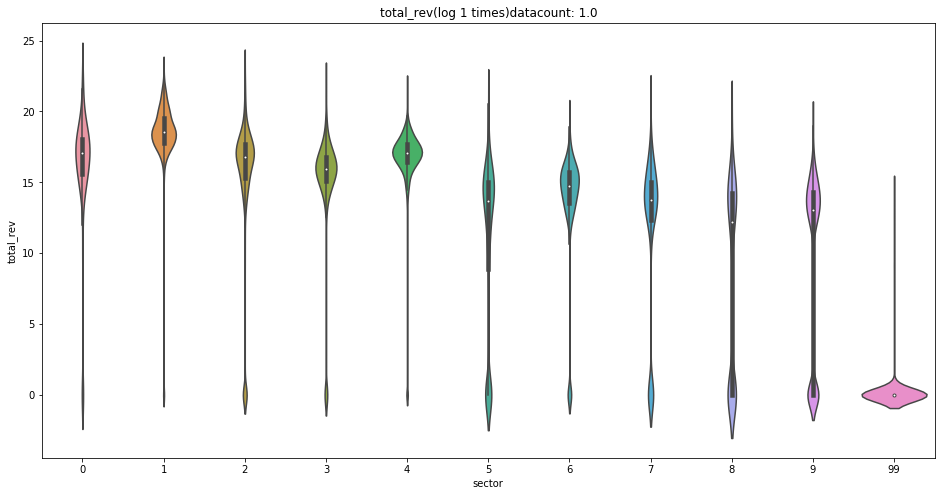

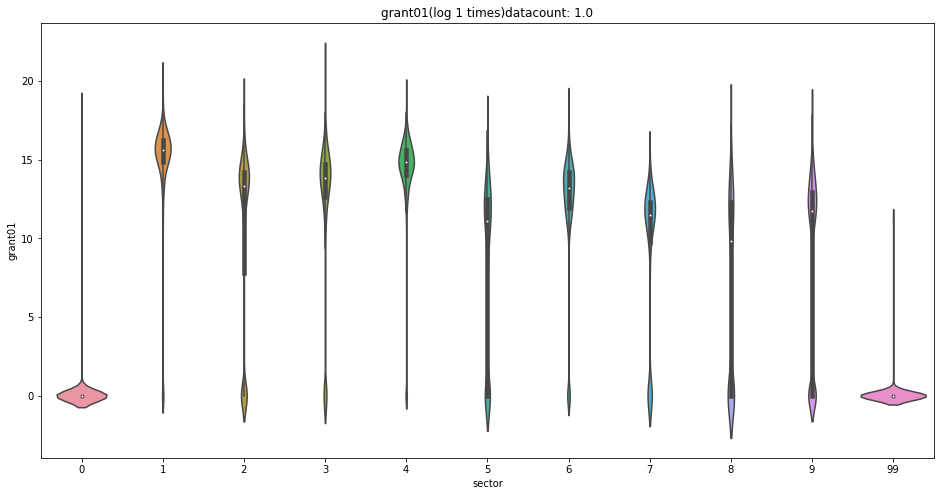

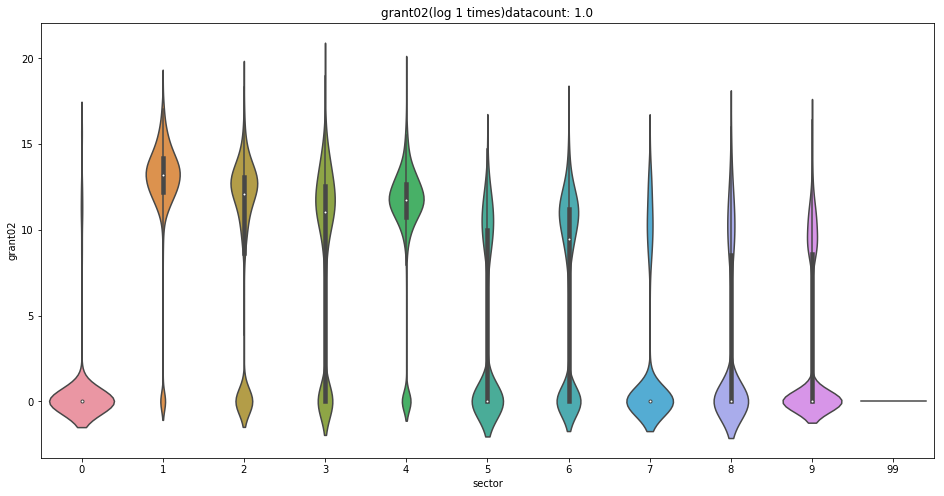

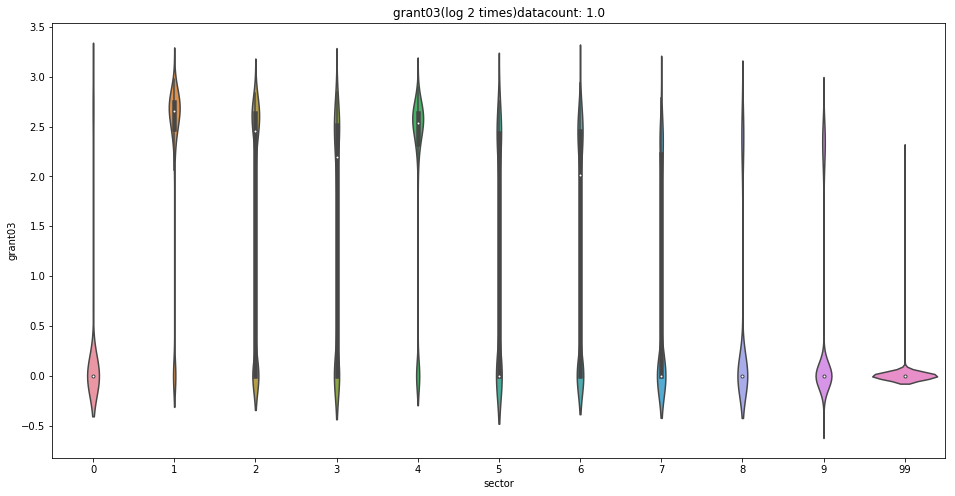

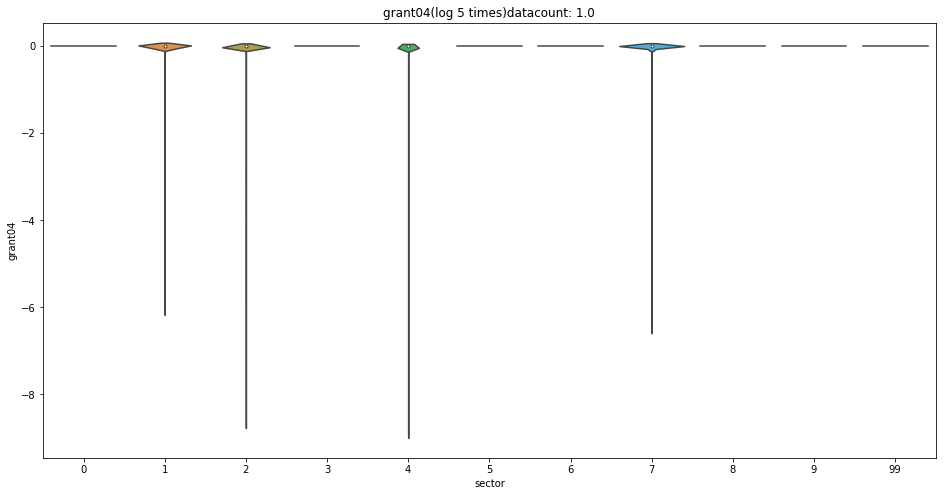

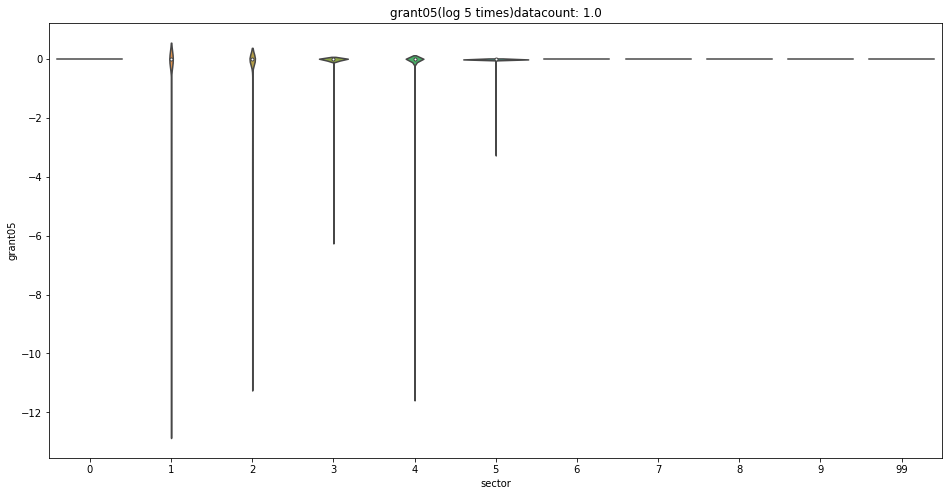

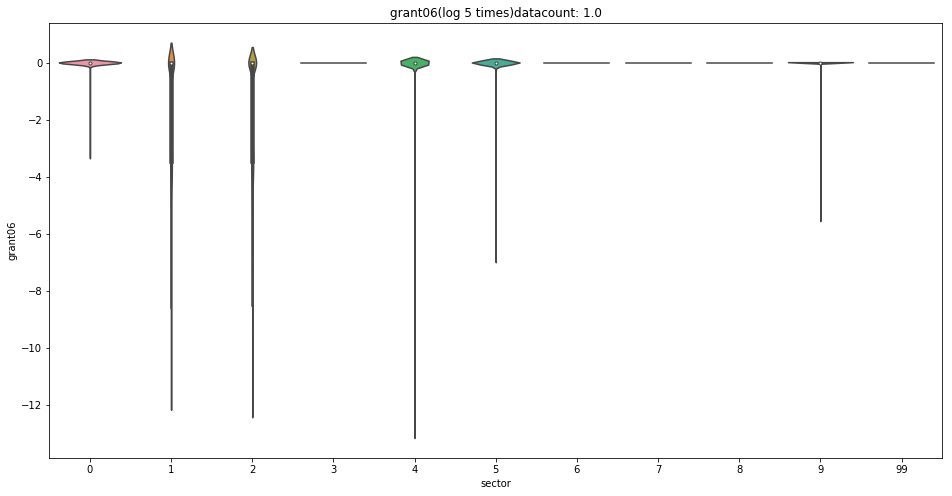

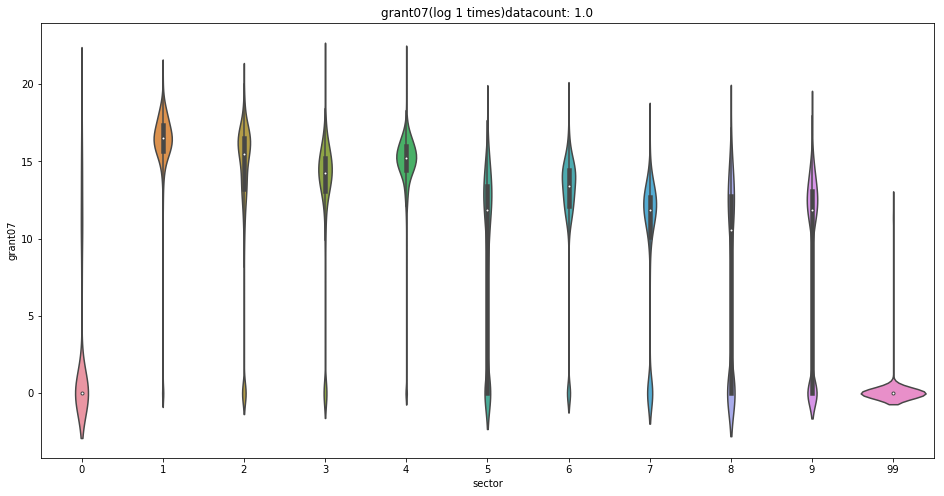

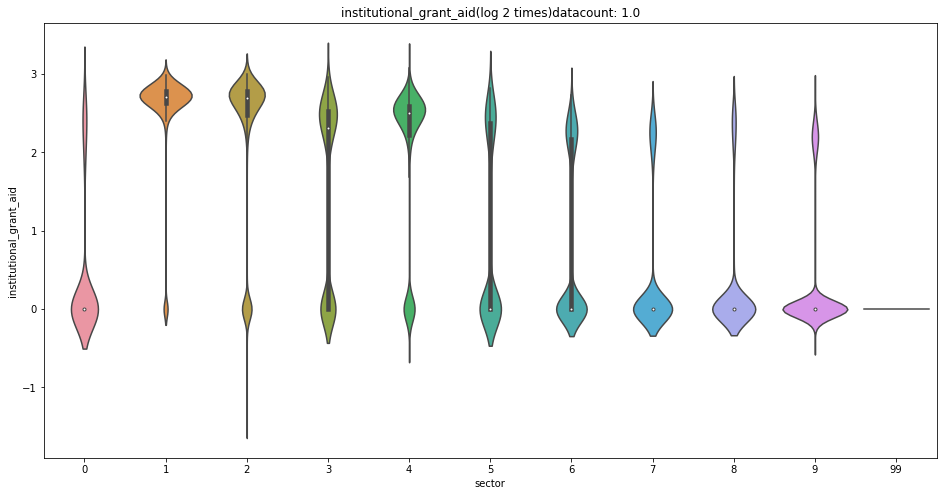

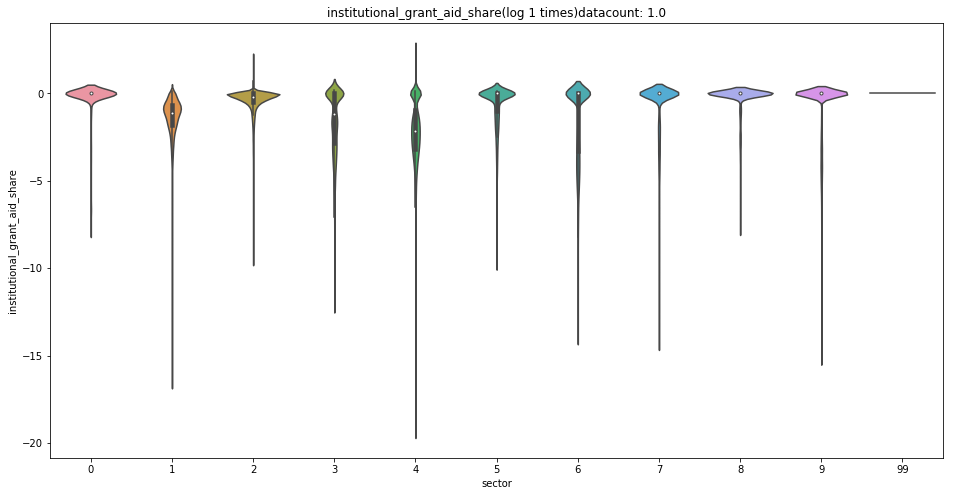

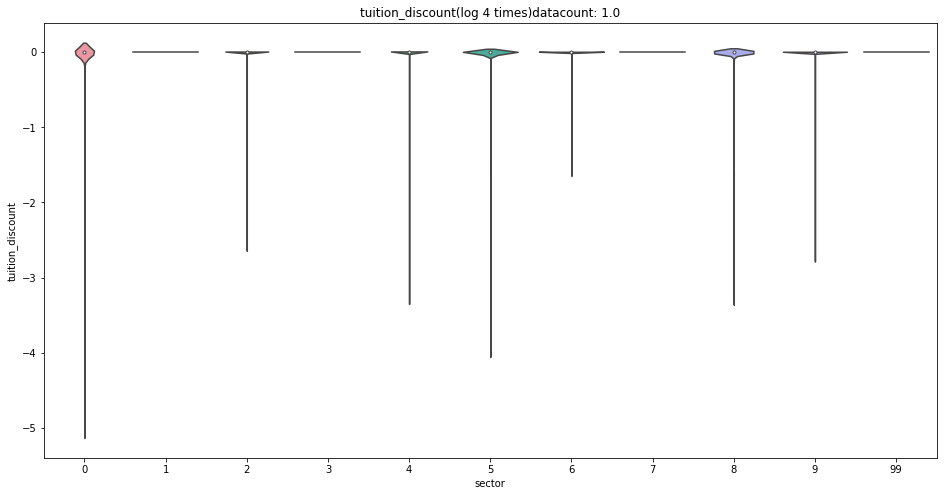

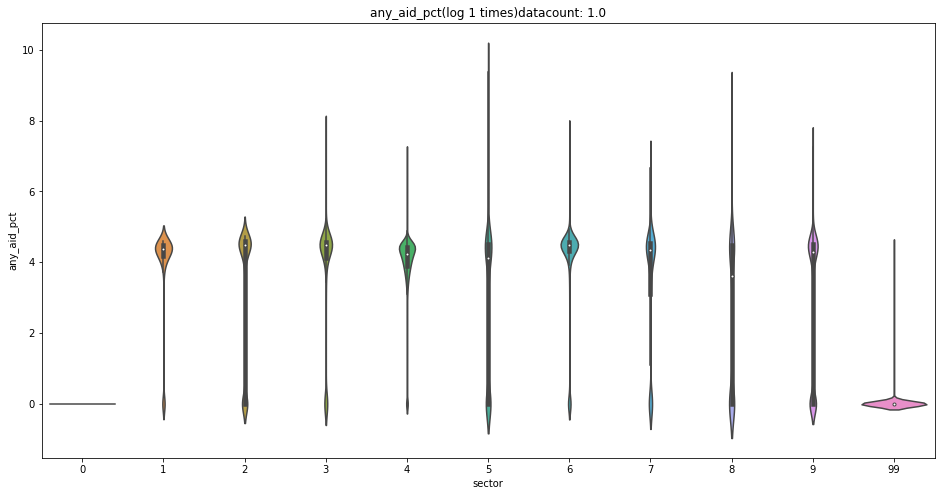

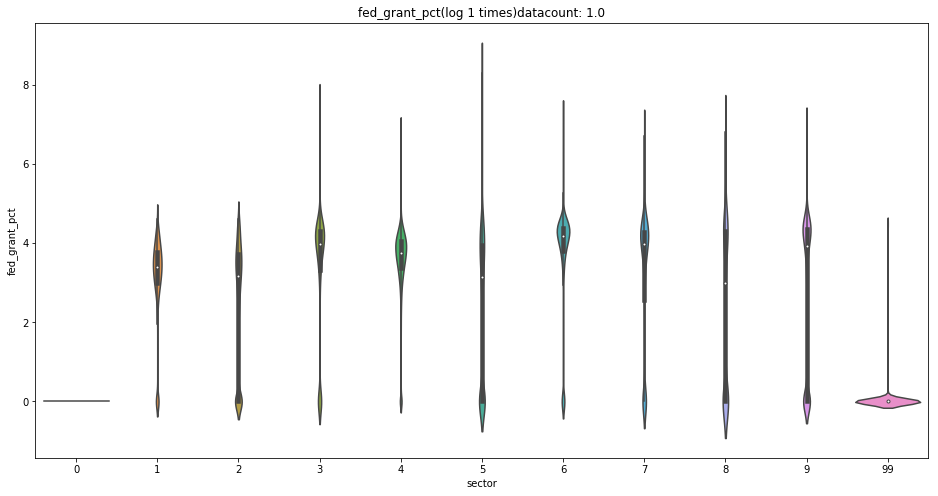

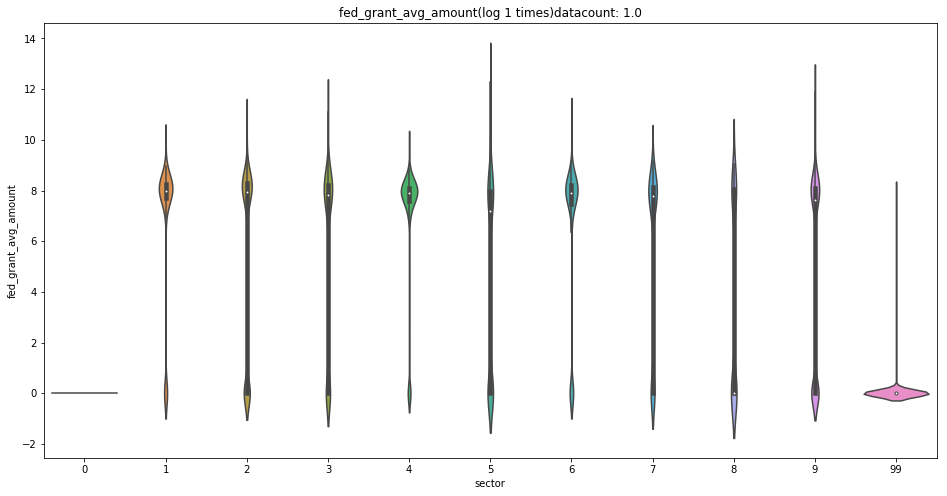

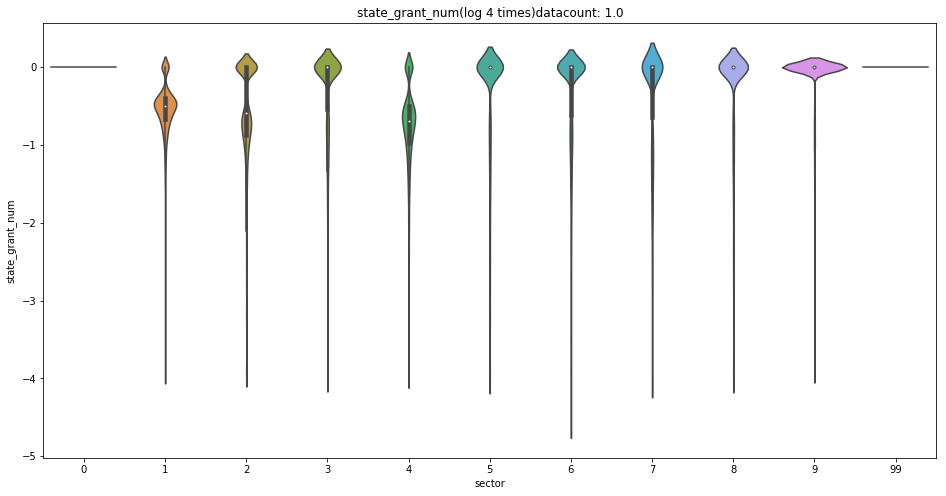

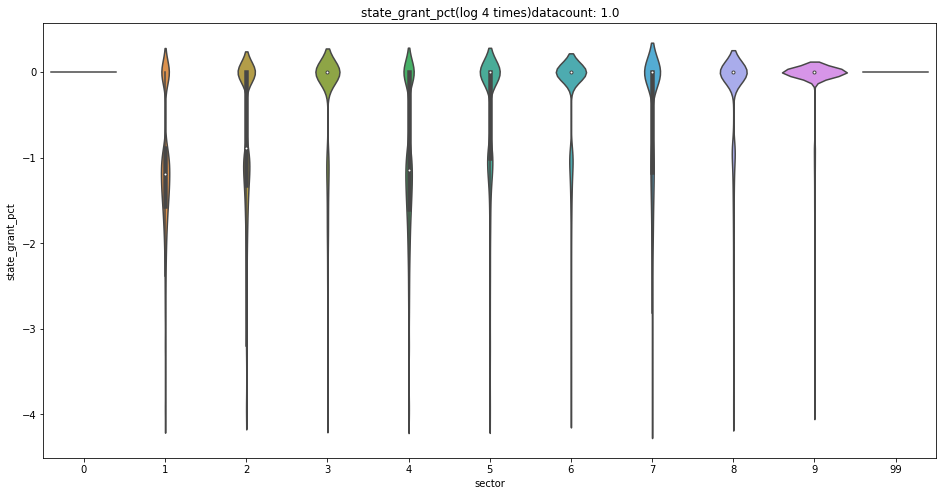

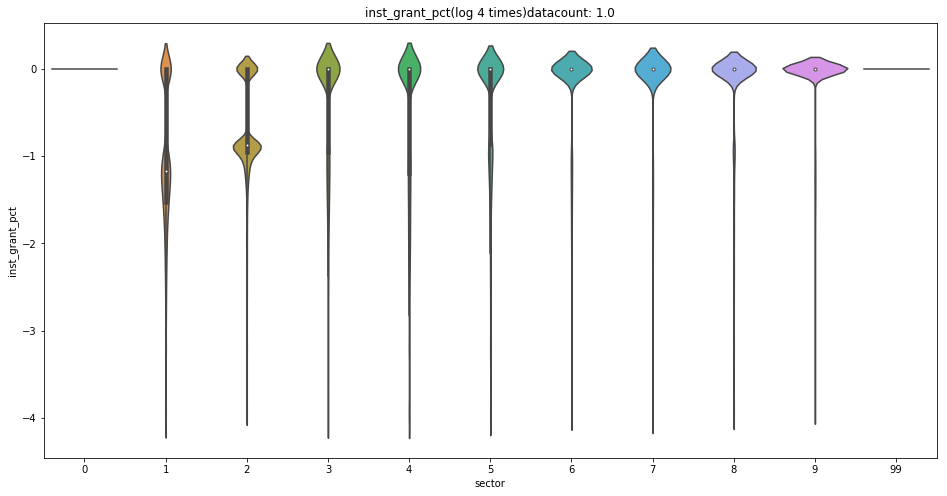

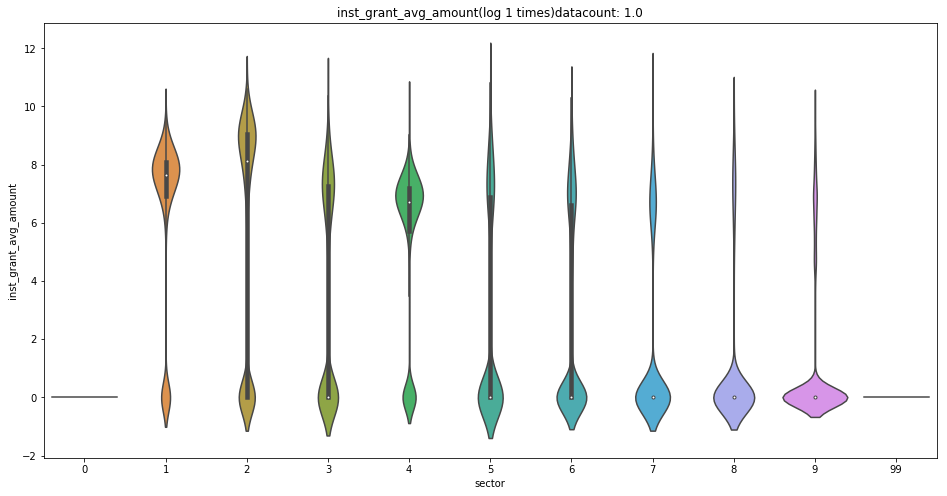

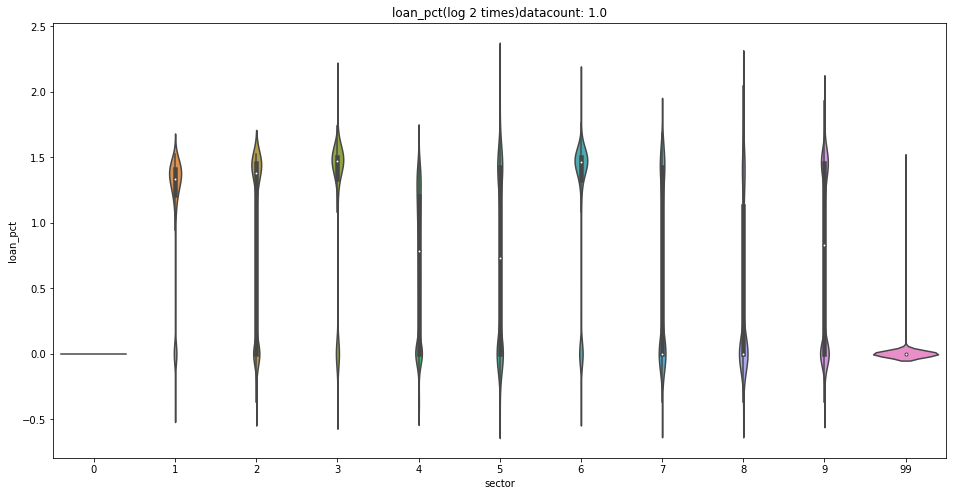

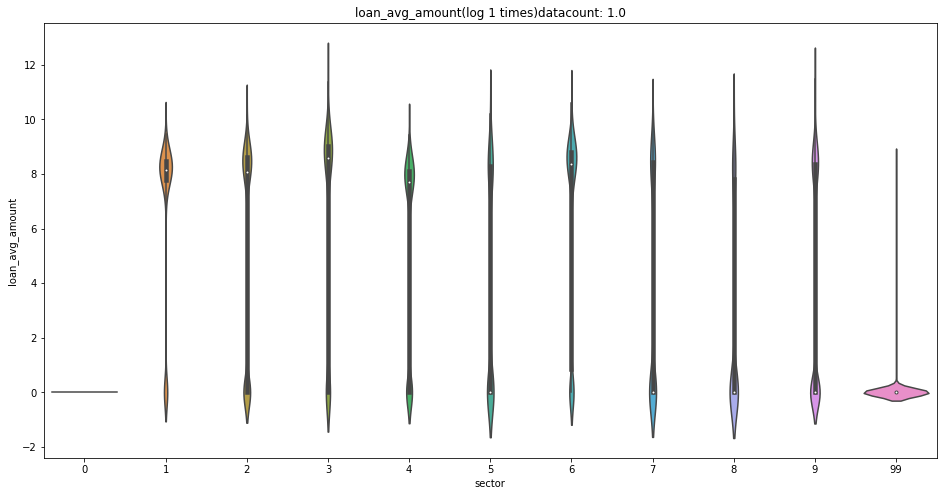

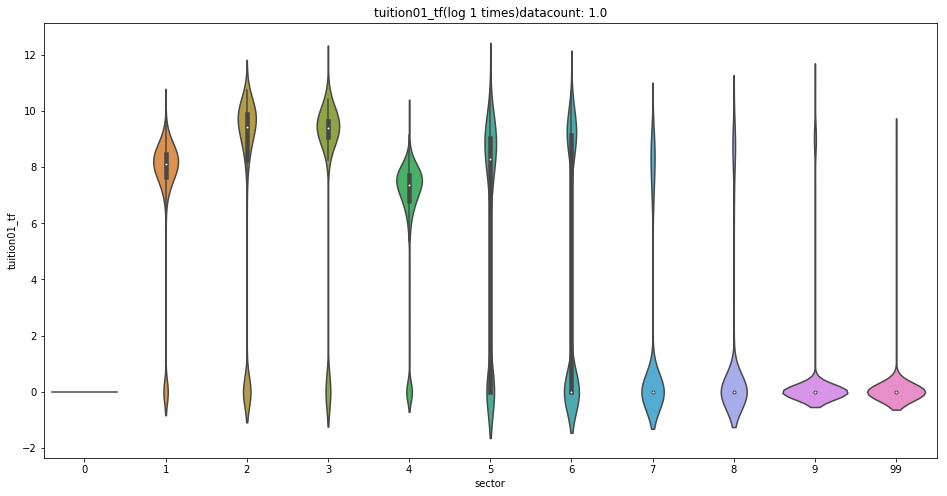

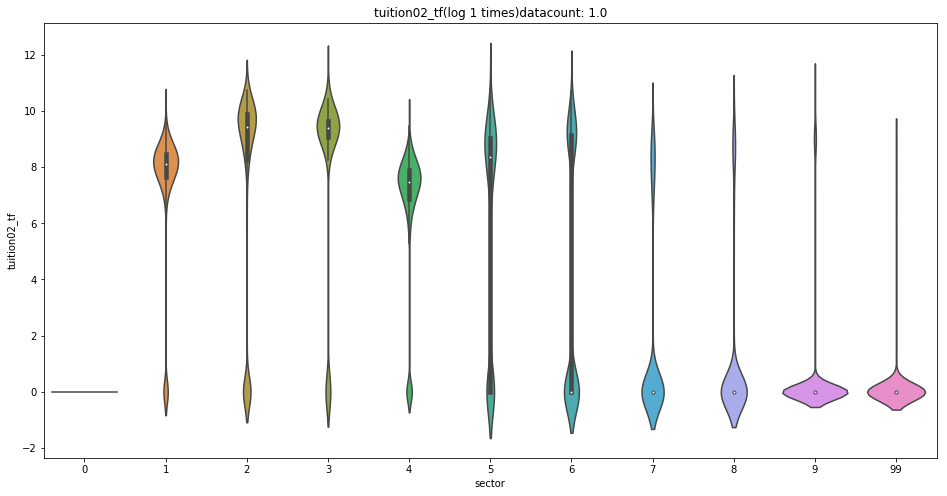

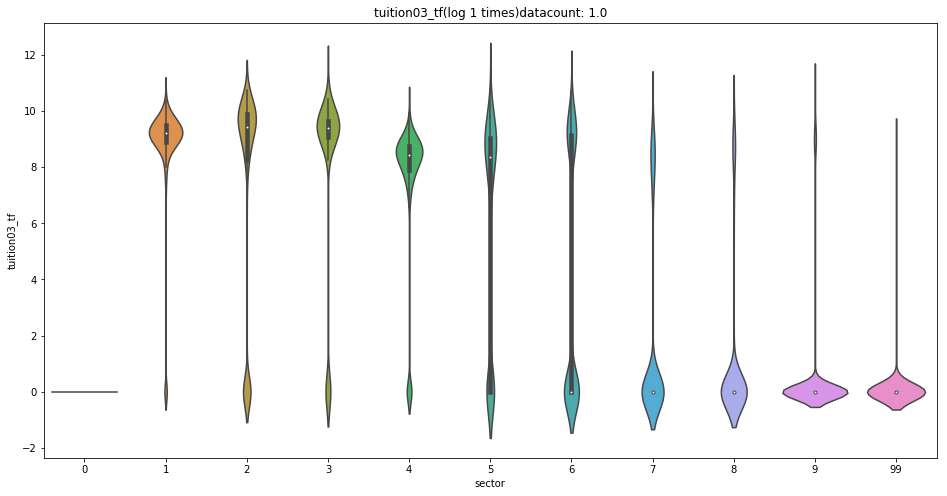

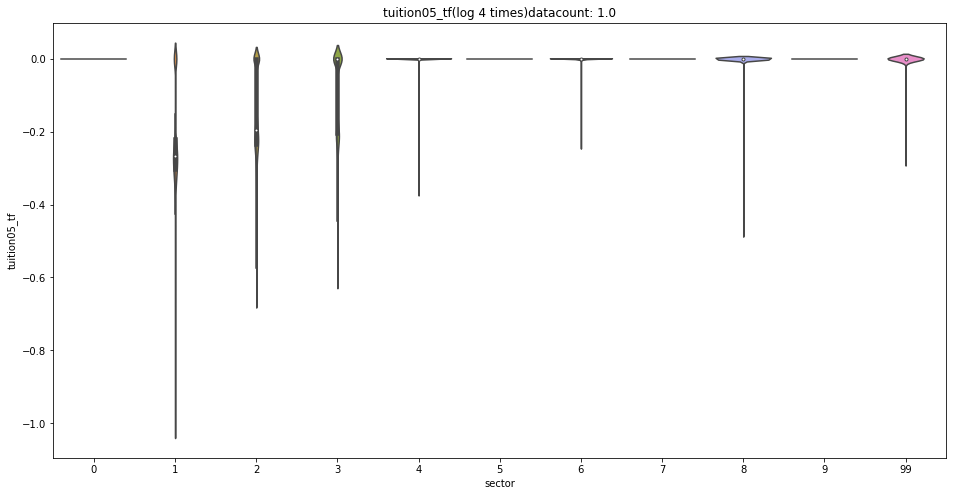

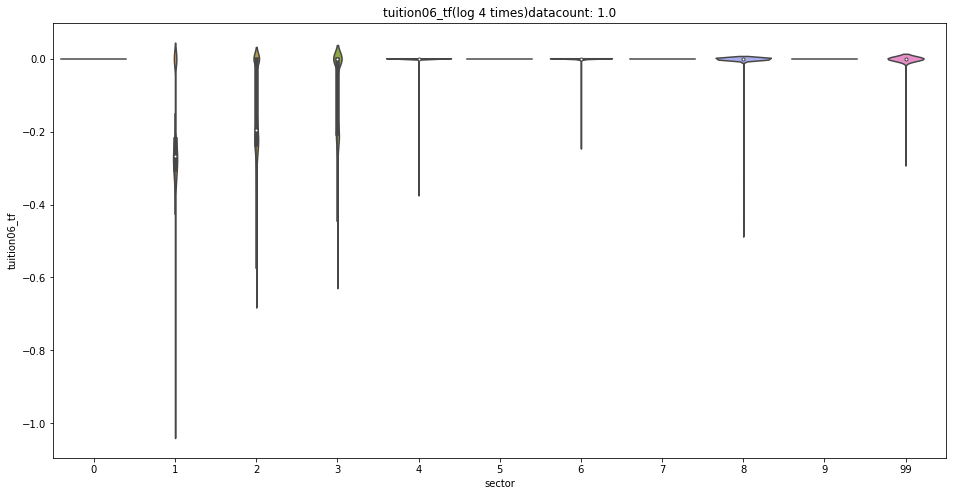

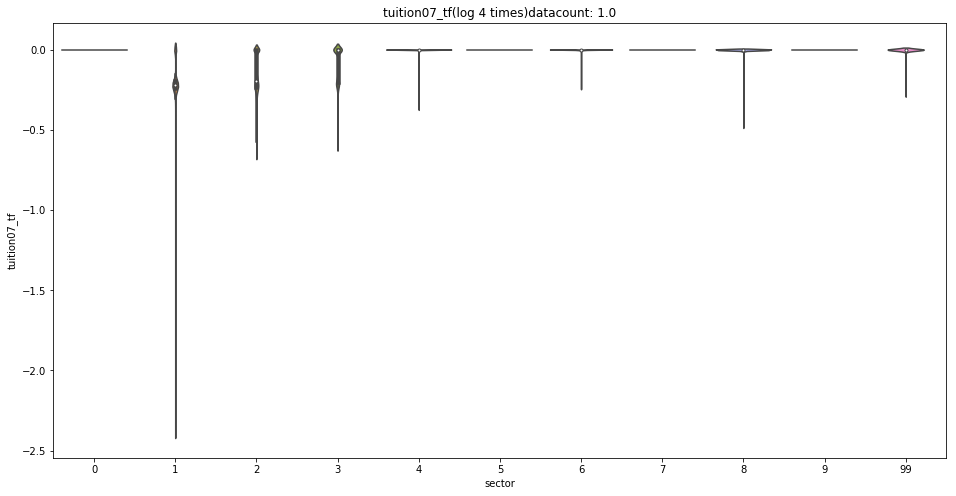

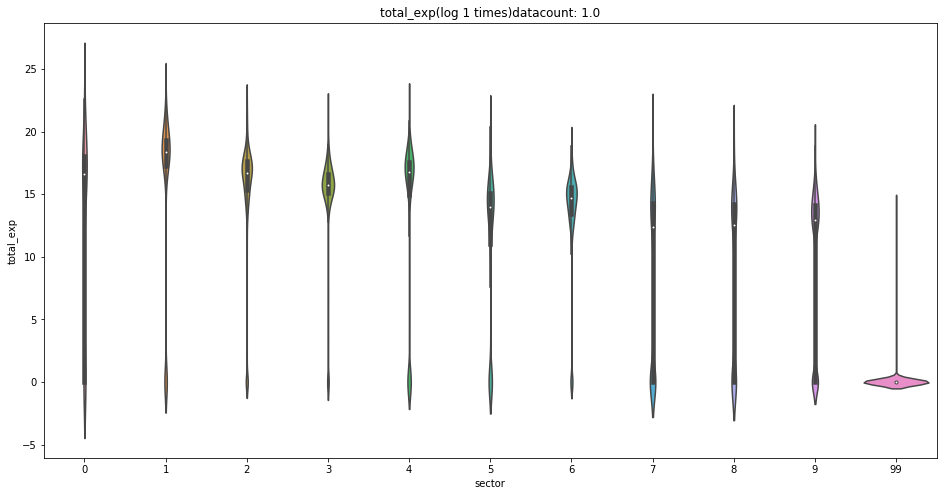

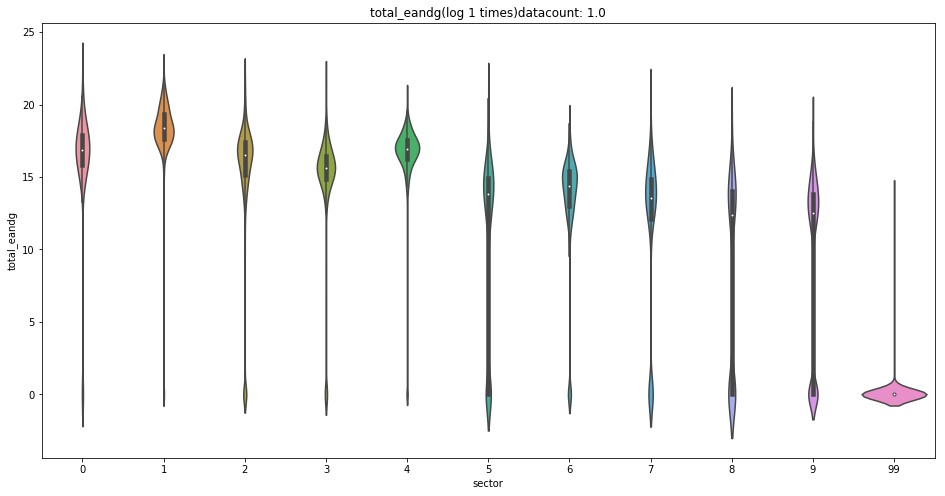

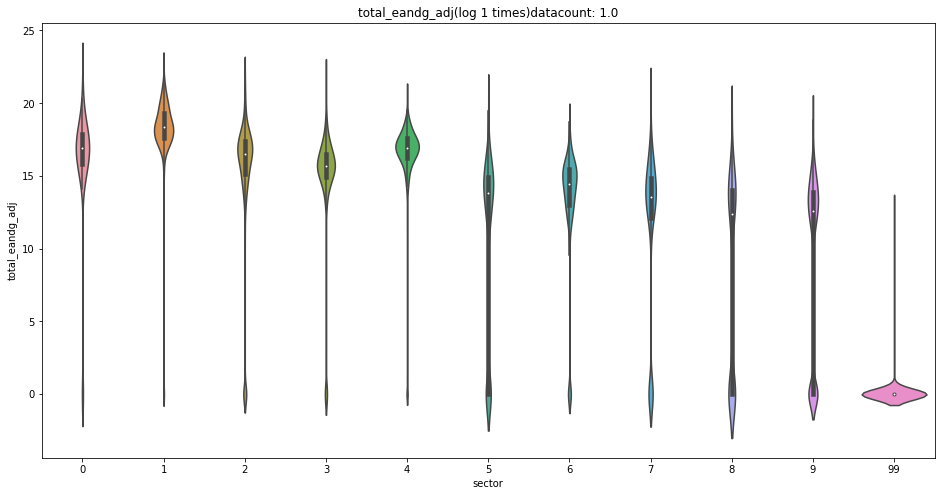

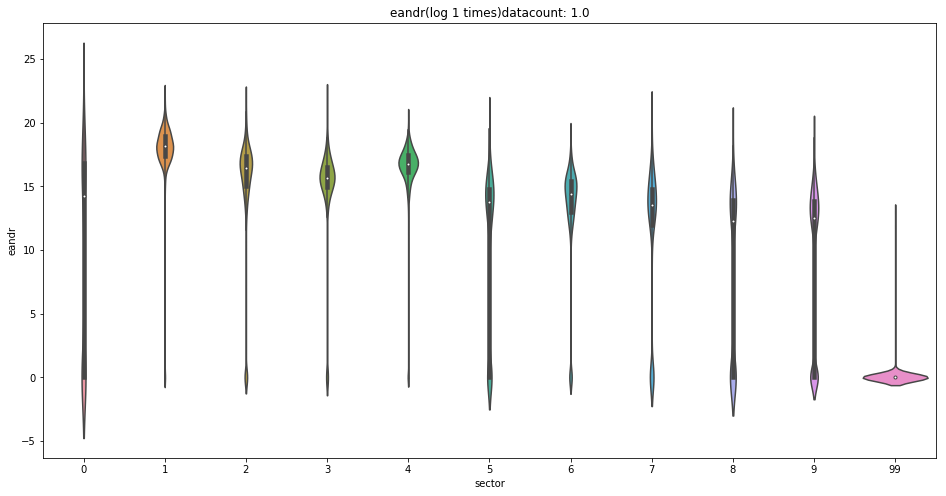

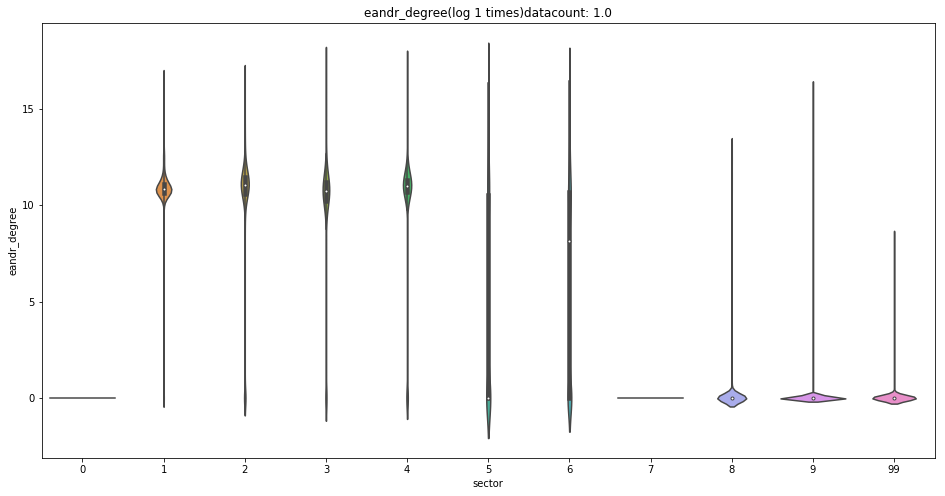

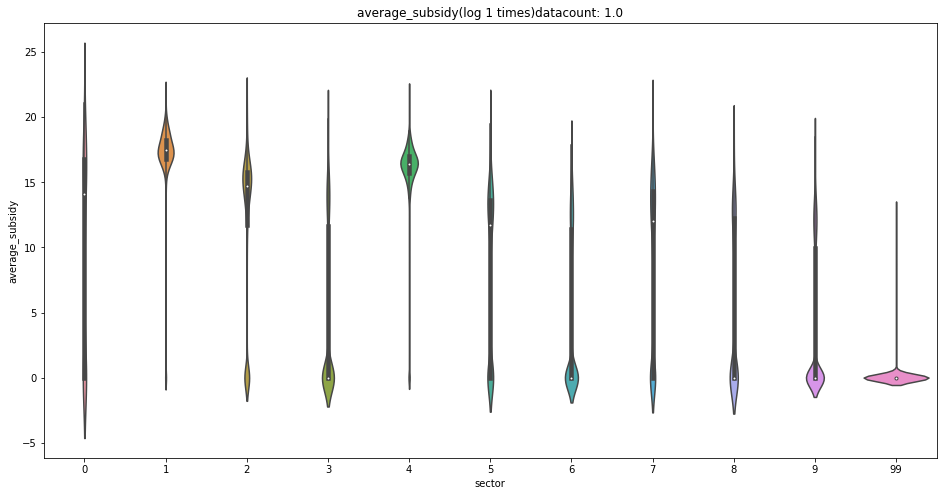

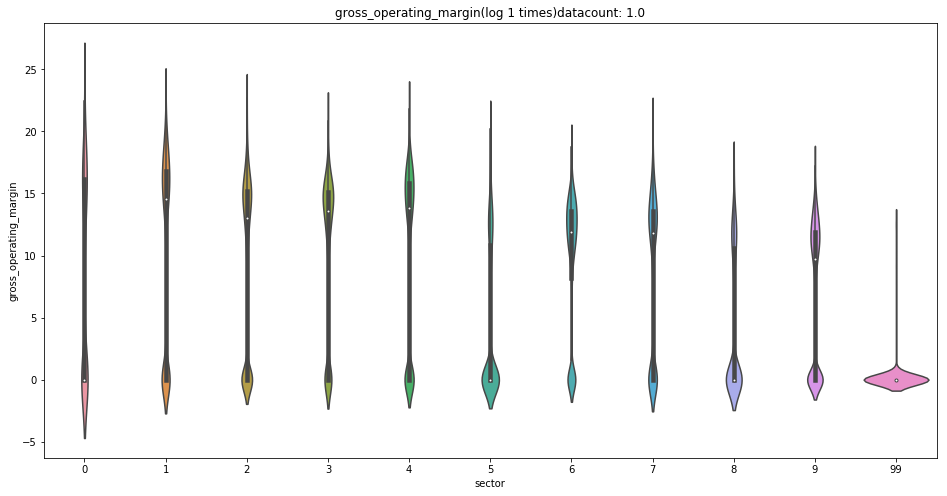

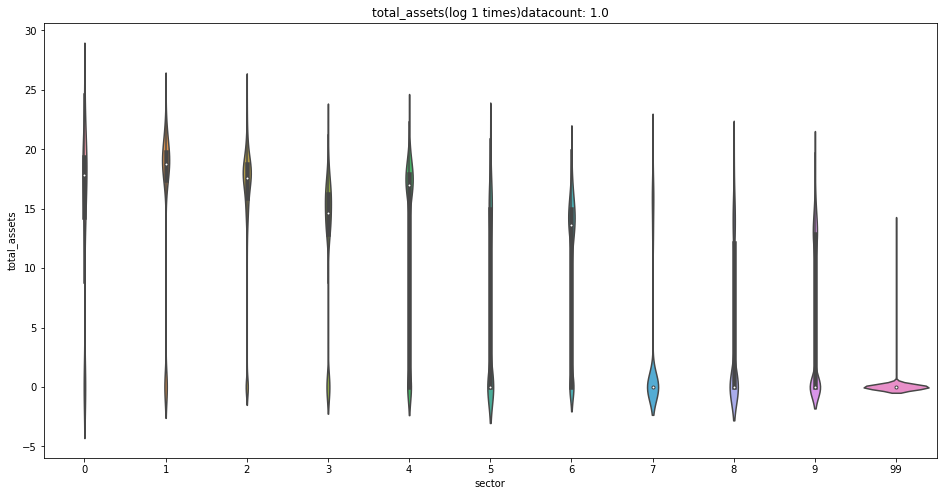

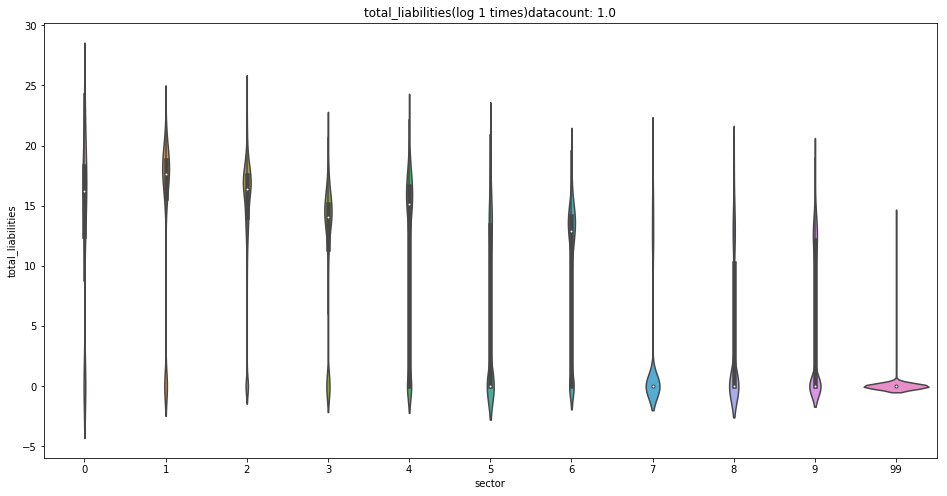

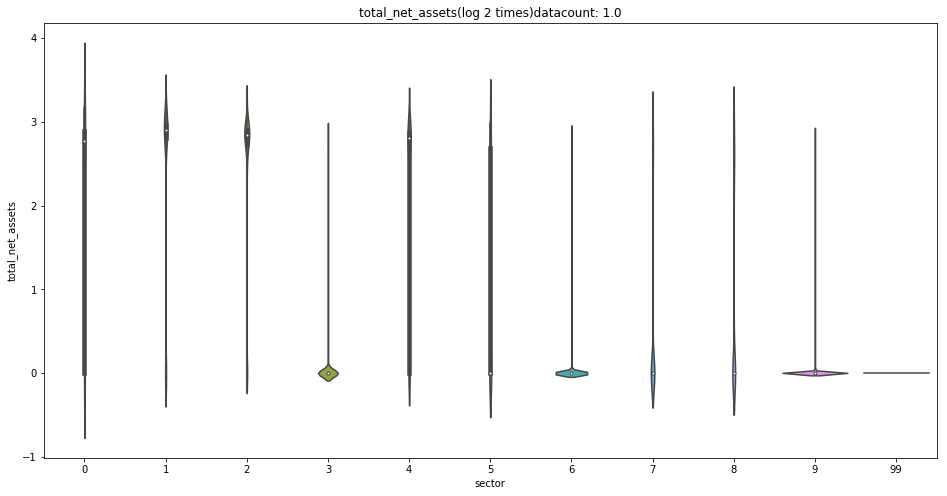

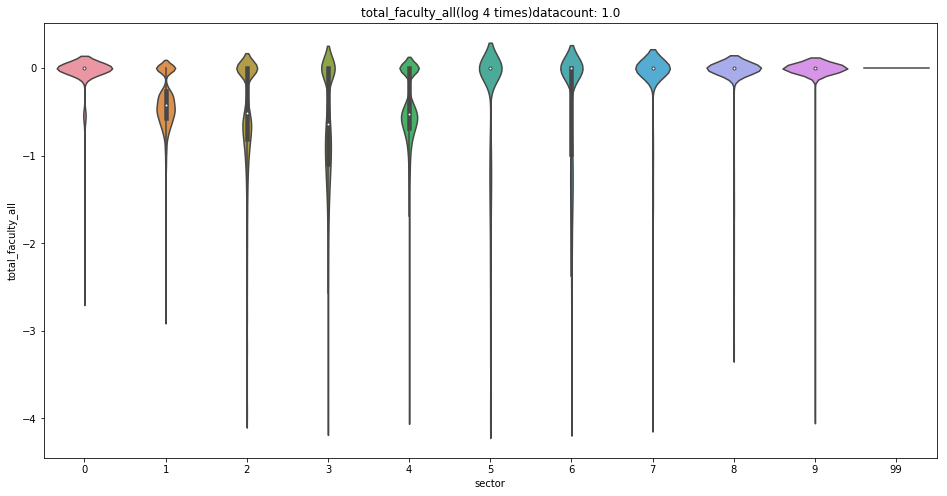

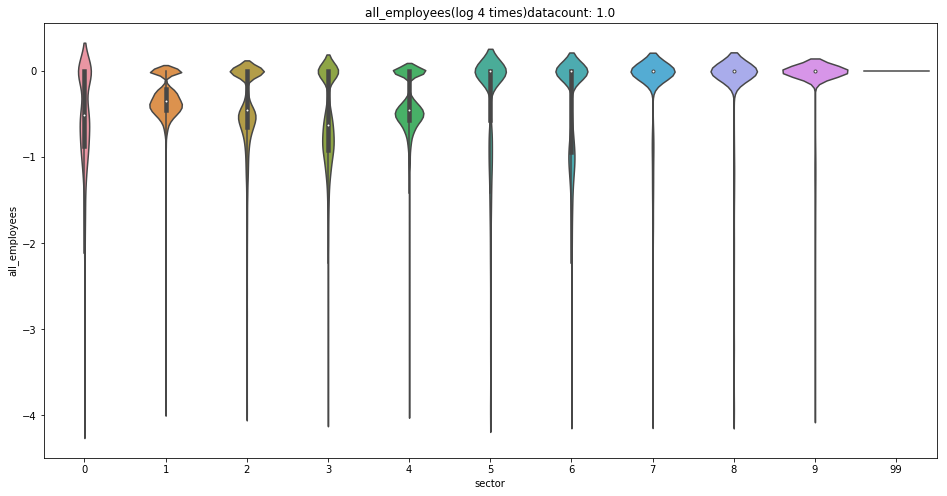

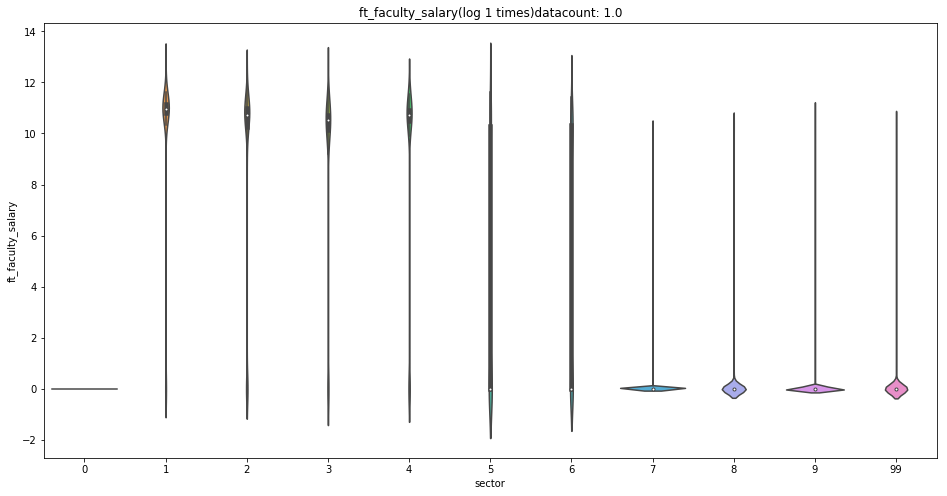

In [33]:
for c in college_financials.columns:
    need_log = False
    col = college_financials[c]
    if col.dtype in (object, np.int64):
        continue
    n = 0
    while (np.abs(col.max() / col.mean()) > 3):
        col = col.apply(lambda x: np.log(x) if x > 0 else 0)
        n += 1
    plt.subplots(figsize=(16,8))
    sns.violinplot(x = college_financials['sector'], y = col)
    plt.title(c + ('(log {} times)'.format(n) if n > 0 else '') + 'datacount: ' + str(col.count()/len(college_financials)))

After initial examination of the data, it looks like overall quality of the data is inferior in sectors 0 and 99 where there are duplicates (in the case of 2010 data for Aveda Institute Chapel Hill) and the overall count is a very small percentage of all the data. so we are going to remove all sectors in 0 and 99

Text(0.5,1,'count by sector')

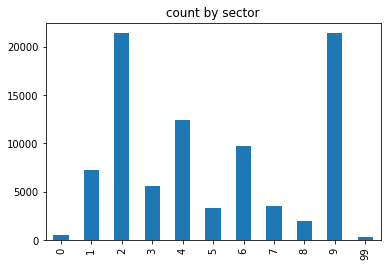

In [46]:
pd.value_counts(college_financials['sector']).sort_index().plot.bar()
plt.title('count by sector')

Text(0.5,1,'count by academic_year')

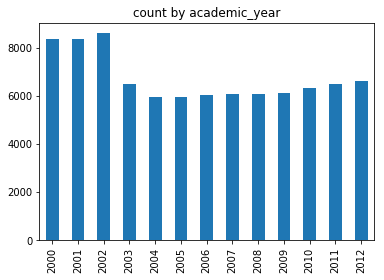

In [47]:
pd.value_counts(college_financials['academic_year']).sort_index().plot.bar()
plt.title('count by academic_year')